In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.sparse import coo_array
import pandas as pd

from scipy.sparse import coo_matrix
from scipy.sparse.linalg import spsolve

In [2]:
import CurvilinearFEM_Trial_2D as FEM


alpha.name='square' transformation
N_divisions=70 N_divisions


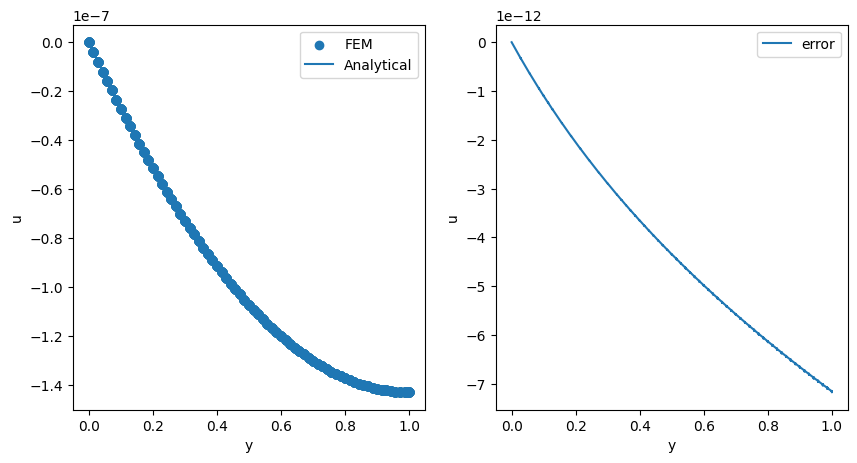

N_divisions=100 N_divisions


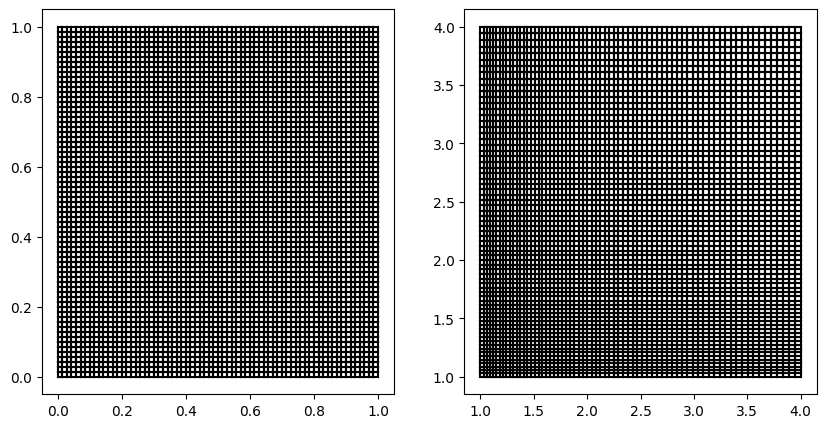

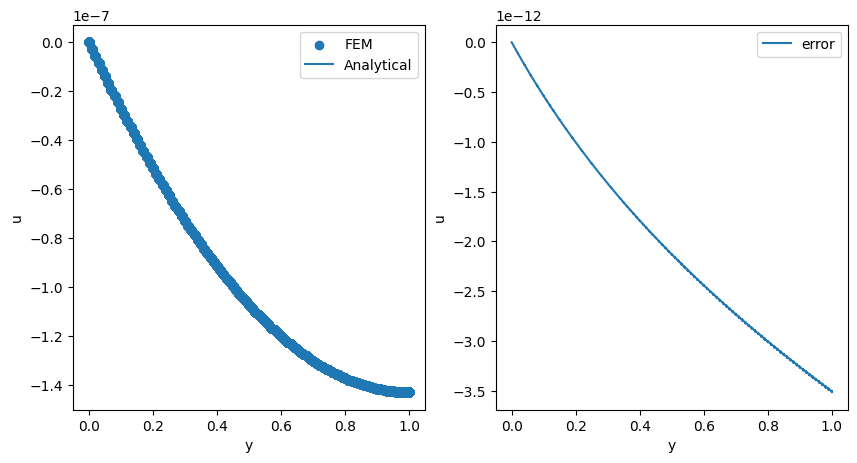

alpha.name='cube' transformation
N_divisions=70 N_divisions


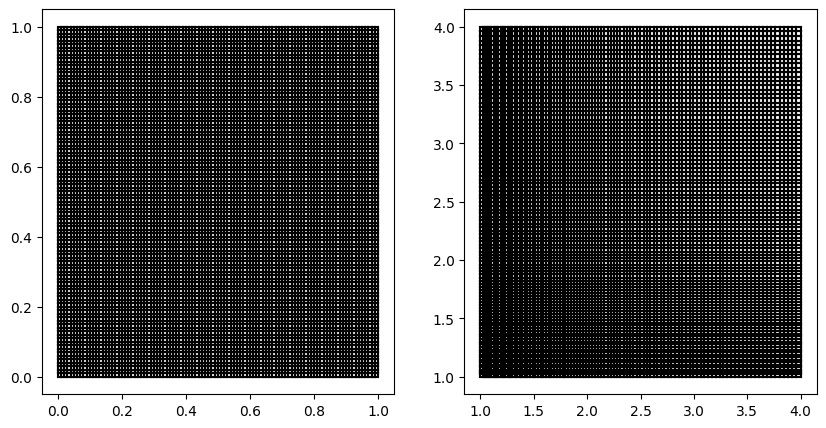

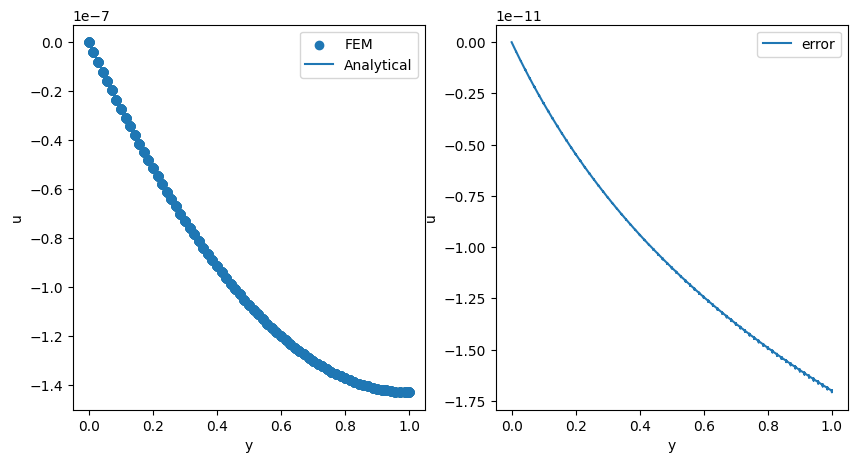

N_divisions=100 N_divisions


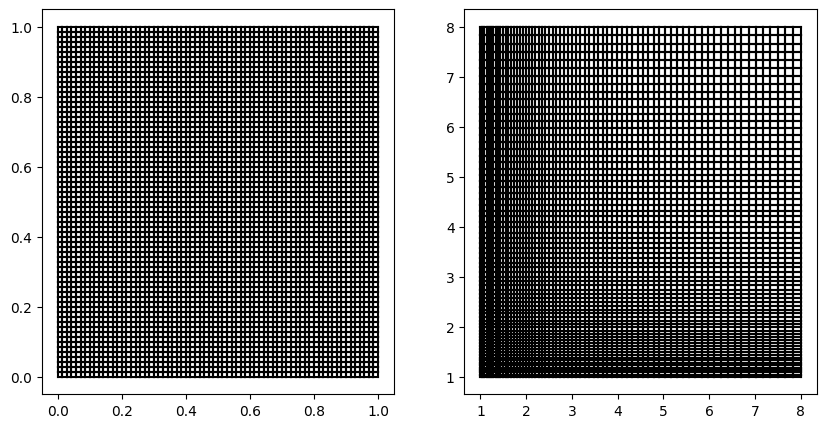

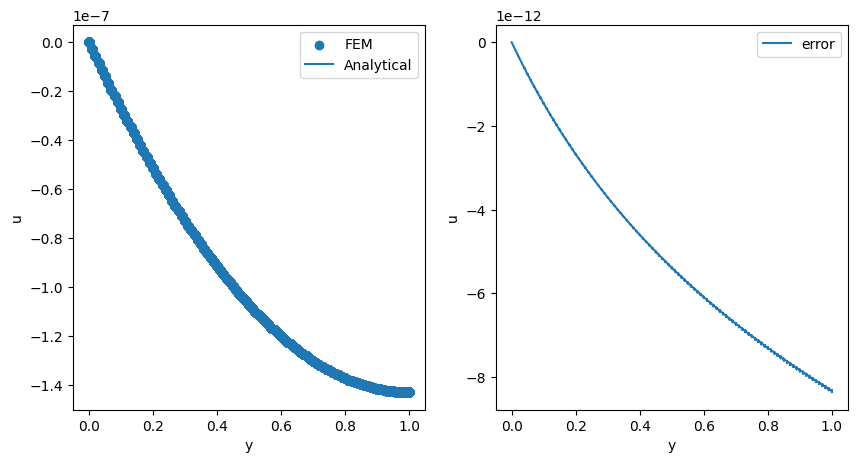

alpha.name='Xlinear-Ysquare' transformation
N_divisions=70 N_divisions


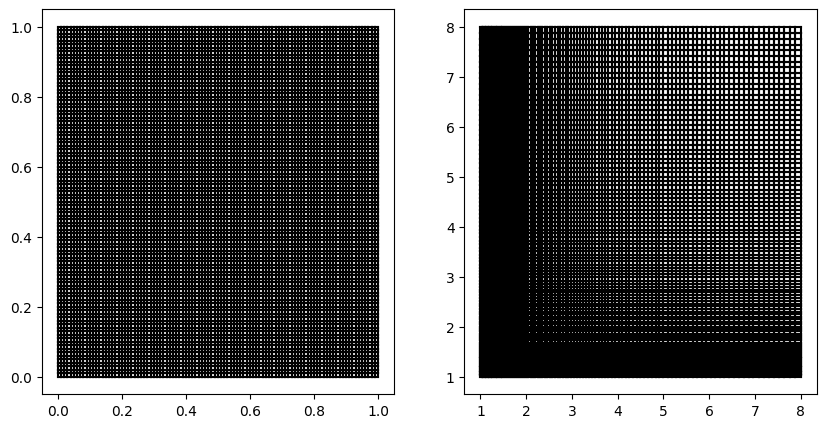

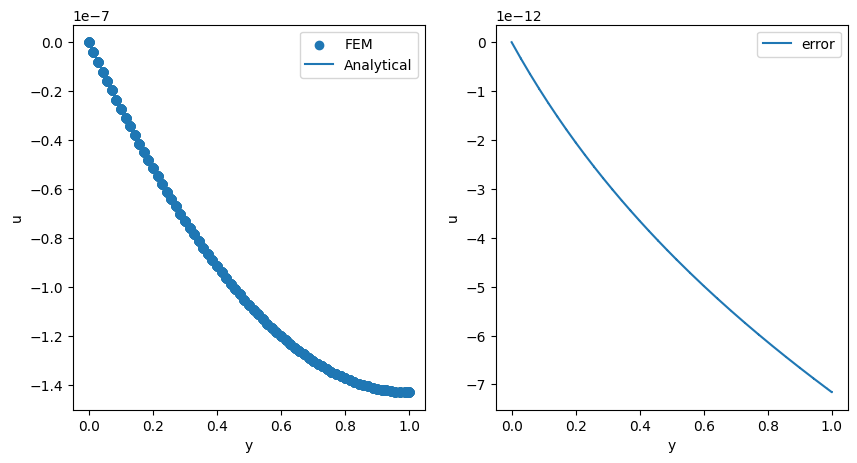

N_divisions=100 N_divisions


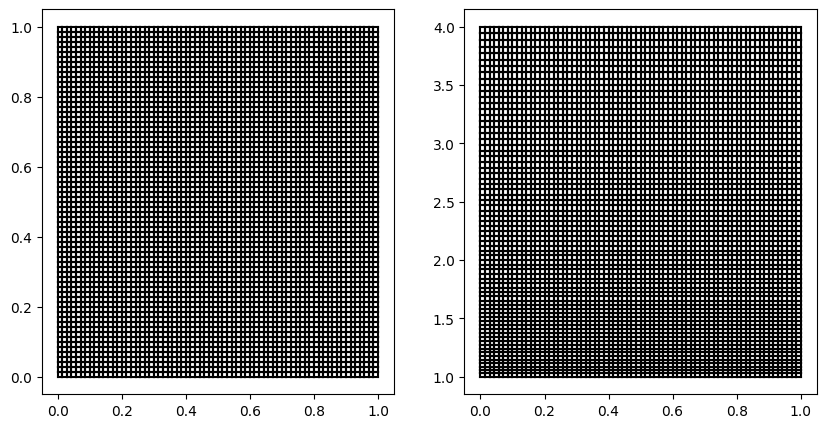

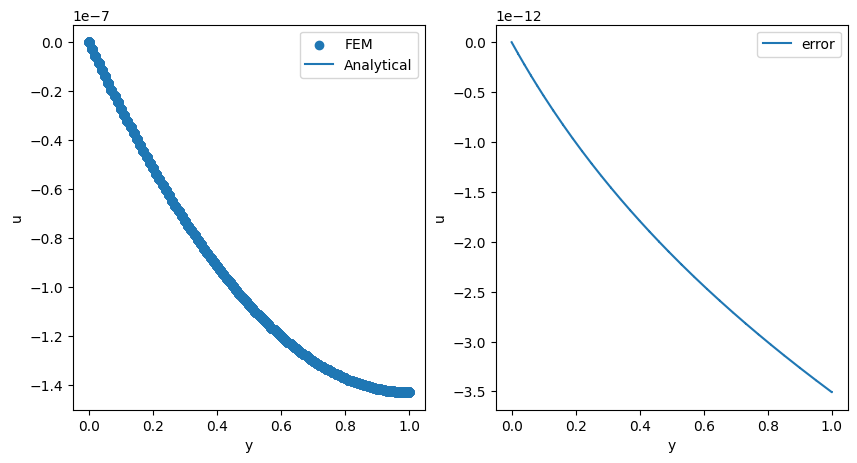

alpha.name='identity' transformation
N_divisions=70 N_divisions


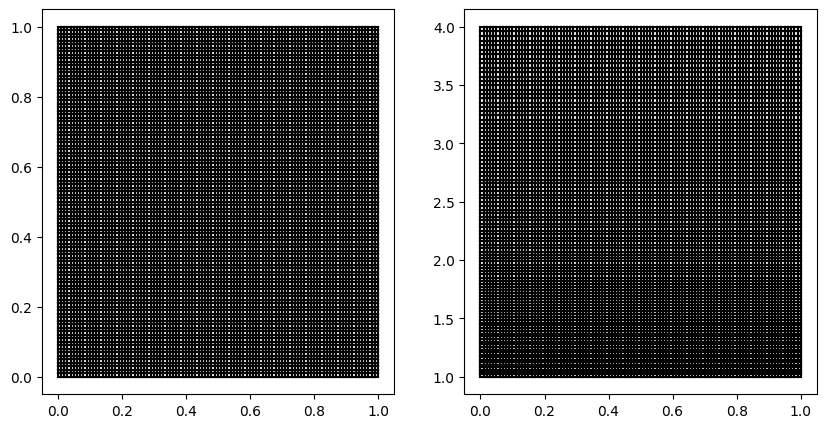

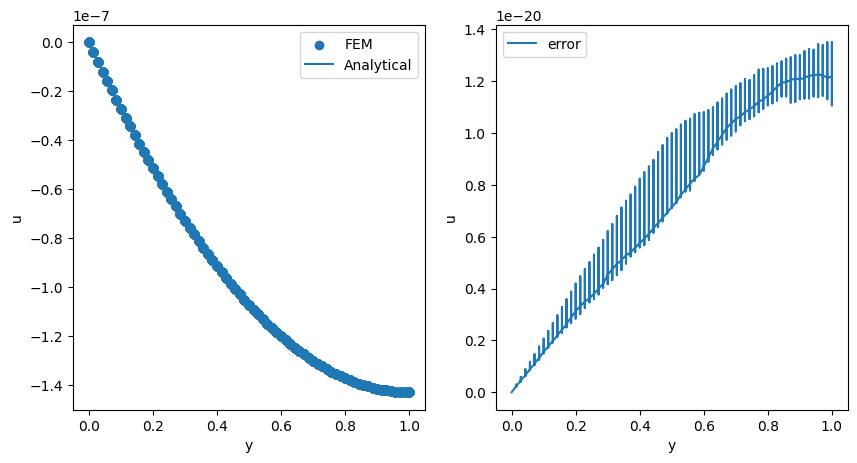

N_divisions=100 N_divisions


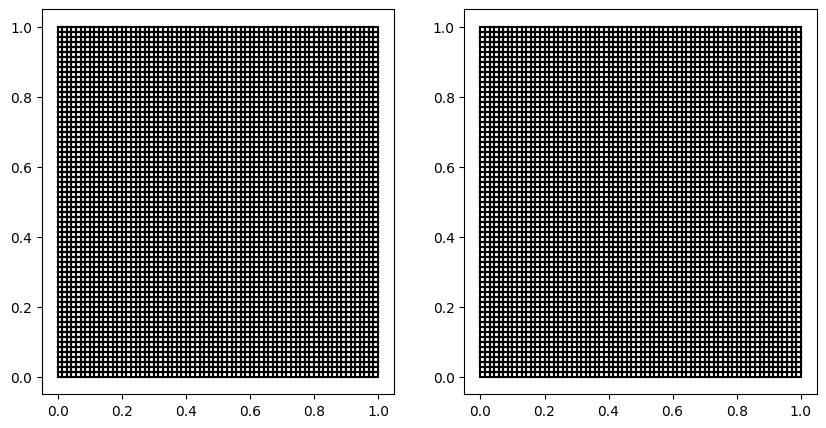

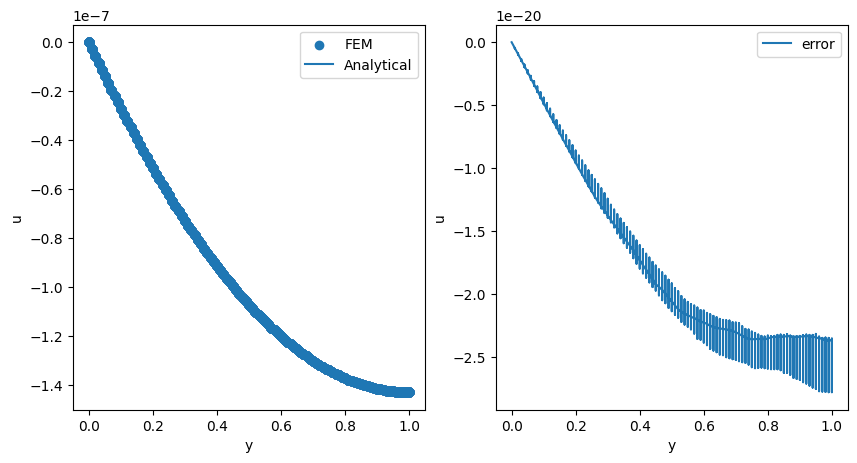

alpha.name='Xlinear-Ysin' transformation
N_divisions=70 N_divisions


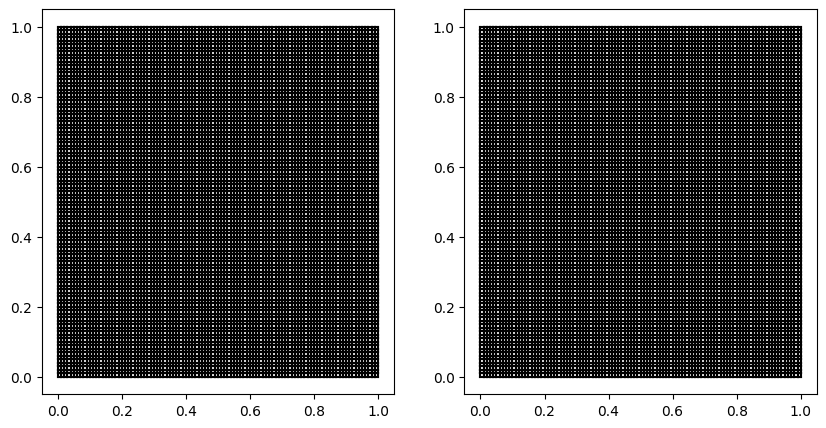

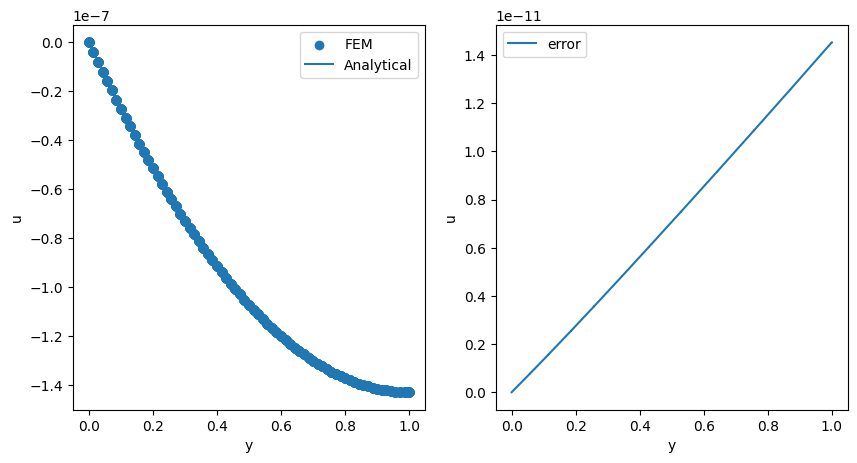

N_divisions=100 N_divisions


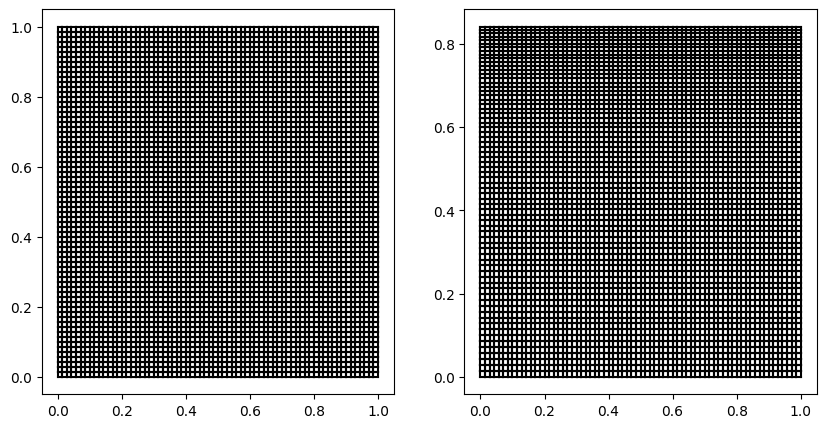

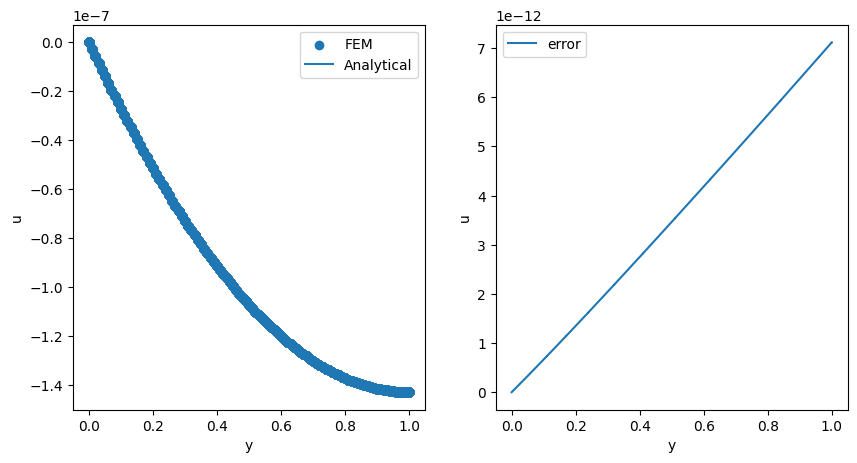

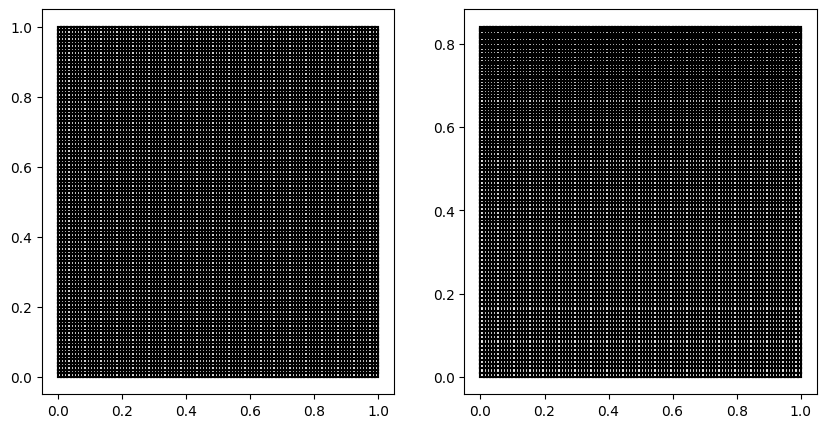

In [4]:
alphas=[FEM.custom_function_2d_vector(lambda xy:  np.array([(xy[0]+1)**2,(xy[1]+1)**2]),
                                      lambda xy:  np.array([[(xy[0]+1)*2,0],[0,(xy[1]+1)*2]]),
                                 lambda st:  np.array([st[0]**0.5-1,st[1]**0.5-1]),
                                 lambda st:  np.array([[[-0.25*st[0]**(-1.5),0],[0,0]],[[0,0],[0,-0.25*st[1]**(-1.5)]]]),
                          "square"),
        FEM.custom_function_2d_vector(lambda xy: np.array( [(xy[0]+1)**3,(xy[1]+1)**3]),
                                      lambda xy: np.array( [[3*(xy[0]+1)**2,0],[0,3*(xy[1]+1)**2]]),
                                 lambda st: np.array( [st[0]**(1/3)-1,st[1]**(1/3)-1]),
                                 lambda st: np.array( [[[-2/9*st[0]**(-5/3),0],[0,0]],[[0,0],[0,-2/9*st[1]**(-5/3)]]]),
                          "cube"),
        FEM.custom_function_2d_vector(lambda xy:  np.array([xy[0],(xy[1]+1)**2]),
                                      lambda xy: np.array( [[1,0],[0,(xy[1]+1)*2]]),
                          lambda st:  np.array( [st[0],st[1]**0.5-1]), 
                                 lambda st: np.array( [[[0,0],[0,0]],[[0,0],[0,-0.25*st[1]**(-1.5)]]]),
                          "Xlinear-Ysquare"),
        FEM.custom_function_2d_vector(lambda xy: np.array( [xy[0],xy[1]]),
                                      lambda xy: np.array( [[1,0],[0,1]]),
                                 lambda st: np.array( [st[0],st[1]]),
                                 lambda st:  np.array([[[0,0],[0,0]],[[0,0],[0,0]]]),
                          "identity"),
        FEM.custom_function_2d_vector(lambda xy: np.array( [xy[0],np.sin(xy[1])]),
                                      lambda xy: np.array( [[1,0],[0,np.cos(xy[1])]]),
                          lambda st:np.array(   [st[0],np.arcsin(st[1])]), 
                                 lambda st: np.array( [[[0,0],[0,0]],[[0,0],[0,st[1]*(1-st[1]**2)**(-1.5)]]]),
                                 
                          "Xlinear-Ysin")]
for alpha in alphas:
    print(f'{alpha.name=} transformation')
    #for N_divisions in [5,10,20,30,40,50]:
    for N_divisions in [70,100]:
        print(f'{N_divisions=} N_divisions')
        FEM.main_vector(N_divisions,alpha)

In [8]:
df=pd.read_csv("output_vector.txt")
df.columns=["N_nodes","N_divisions","alpha","RMSE"]
df

,N_nodes,N_divisions,alpha,RMSE
0,36,5,square,1.031000e-09
1,121,10,square,2.580000e-10
2,441,20,square,6.500000e-11
3,961,30,square,2.900000e-11
4,36,5,square,1.030911e-09
5,36,5,square,1.030911e-09
6,121,10,square,2.582461e-10
7,441,20,square,6.459370e-11
8,961,30,square,2.871090e-11
9,1681,40,square,1.615040e-11


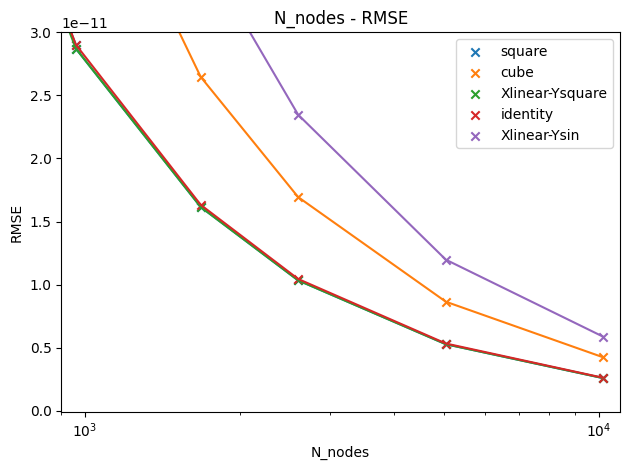

In [15]:
# Plot df, per alpha
# x: N_nodes(log), y: RMSE
for alpha in df.alpha.unique():
    df_alpha=df[df.alpha==alpha]
    # sort df alpha by N_nodes
    df_alpha=df_alpha.sort_values("N_nodes")
    plt.plot(df_alpha.N_nodes,df_alpha.RMSE)#
    plt.scatter(df_alpha.N_nodes,df_alpha.RMSE,label=alpha,marker='x')
# plt.xlim(1000,15000)
# #plt.ylim(-0.0001,0.01)
# plt.ylim(-0.00001,0.001)
plt.xscale('log')
plt.xlabel('N_nodes')
plt.ylabel('RMSE')
plt.title('N_nodes - RMSE')
plt.legend()
plt.tight_layout()
plt.savefig("RMSE_evol1.png")
plt.xlim(100,11000)
plt.ylim(-1e-12,3e-10)
plt.savefig("RMSE_evol2.png")
plt.xlim(900,11000)
plt.ylim(-1e-13,3e-11)
plt.savefig("RMSE_evol3.png")
plt.show()
